In [1]:
import intake
import cartopy.crs as ccrs
import cmocean
import easygems.healpix as egh
import healpix
import matplotlib.pyplot as plt
import seaborn as sns


cat = intake.open_catalog("http://data.nextgems-h2020.eu/catalog.yaml")

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be mo

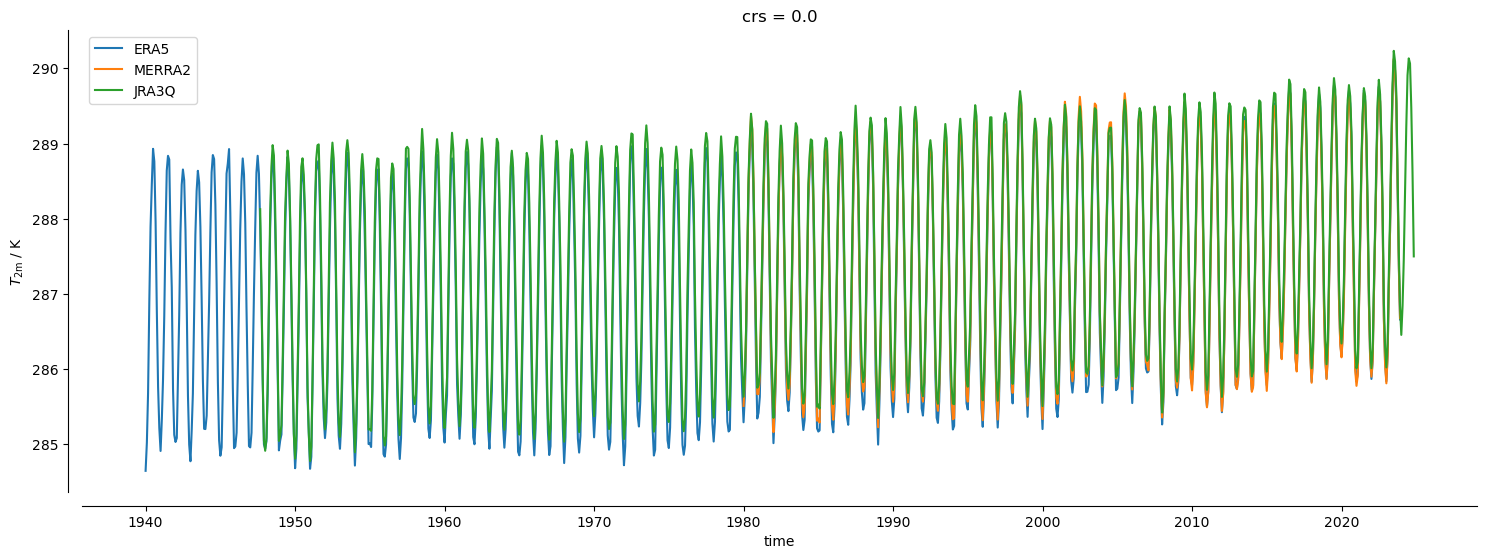

In [6]:
datasets = {
    "ERA5": cat.ERA5(chunks={"cell": -1}).to_dask()["2t"],
    "MERRA2": cat.MERRA2(chunks={"cell": -1}).to_dask()["t2m"],
    "JRA3Q": cat.JRA3Q(chunks={"cell": -1}).to_dask()["mean2t"],
}

fig, ax = plt.subplots(figsize=(18, 6))
for label, sst in datasets.items():
    sst.mean("cell").plot(label=label, ax=ax)
ax.legend()
ax.set_ylabel(r"$T_\mathrm{2m}$ / K")
sns.despine(offset=10)

In [3]:
ds = cat.ERA5(chunks={"cell": -1}).to_dask()["2t"]

hamburg = healpix.ang2pix(
    ds.crs.healpix_nside, 9.993333, 53.550556, lonlat=True, nest=ds.crs.healpix_nside
)

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be mo

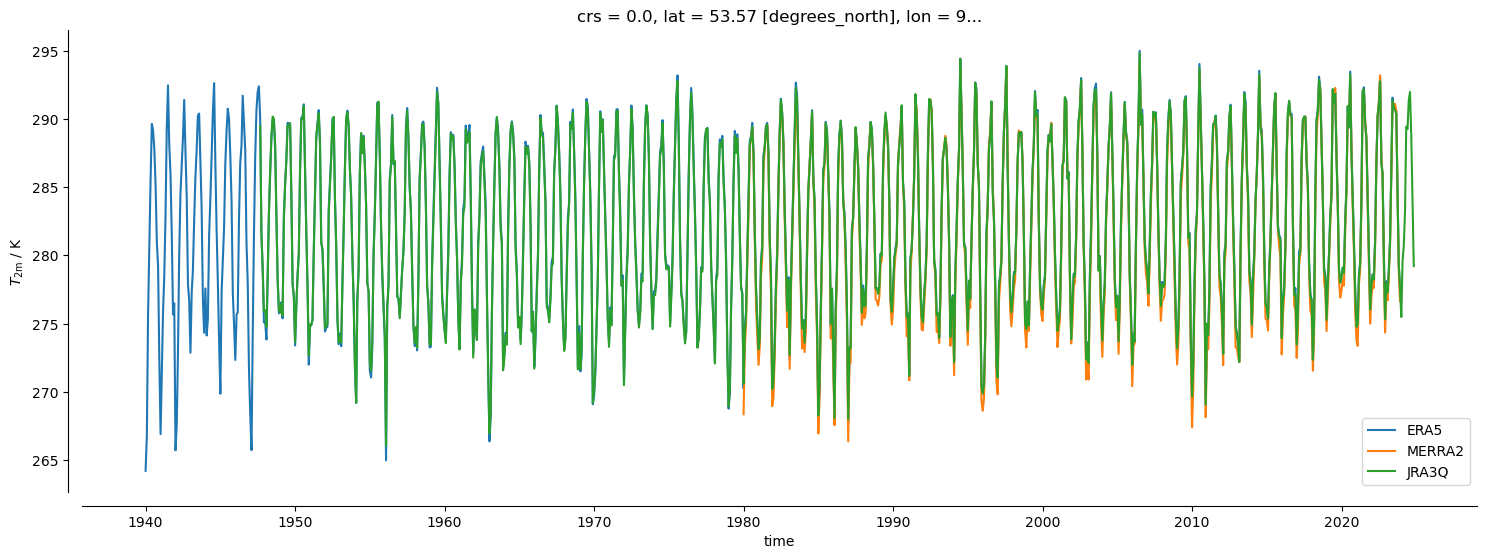

In [5]:
datasets = {
    "ERA5": cat.ERA5(chunks={}).to_dask()["2t"],
    "MERRA2": cat.MERRA2(chunks={}).to_dask()["t2m"],
    "JRA3Q": cat.JRA3Q(chunks={}).to_dask()["mean2t"],
}

fig, ax = plt.subplots(figsize=(18, 6))
for label, sst in datasets.items():
    sst.sel(cell=hamburg).plot(label=label, ax=ax)
ax.legend()
ax.set_ylabel(r"$T_\mathrm{2m}$ / K")
sns.despine(offset=10)

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be mo

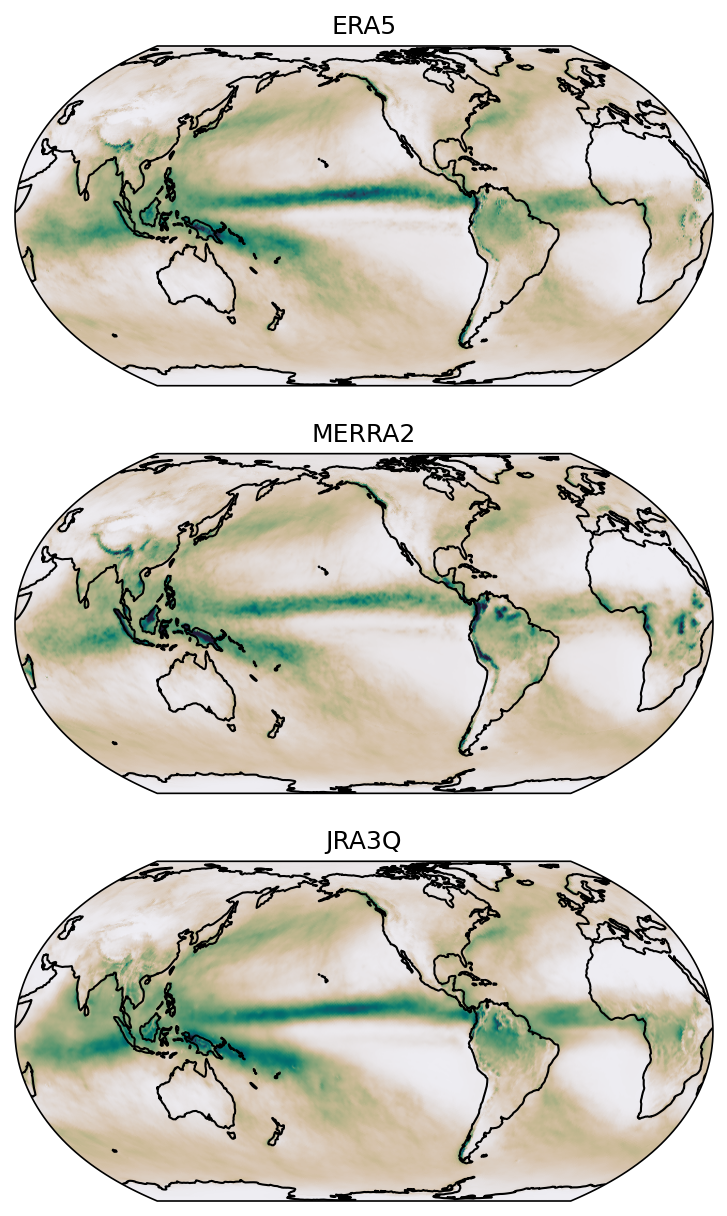

In [14]:
datasets = {
    "ERA5": cat.ERA5(chunks={"cell":-1}).to_dask()["tp"],
    "MERRA2": cat.MERRA2(chunks={'cell':-1}).to_dask()["prectot"]*86.4,
    "JRA3Q": cat.JRA3Q(chunks={"cell":-1}).to_dask()["mtpr"] *86.4
    ,
}

fig, axes = plt.subplots(nrows=3, dpi=150, figsize=(6.4, 10), subplot_kw={"projection": ccrs.EqualEarth(-135.58)})
for (label, var), ax in zip(datasets.items(), axes):
    ax.set_global()
    ax.coastlines()
    egh.healpix_show(var.sel(time="2020").mean("time"), vmax=0.02,  cmap="cmo.rain", ax=ax)
    ax.set_title(label)

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be mo

Text(0.5, 1.0, 'MERRA2 - ERA5')

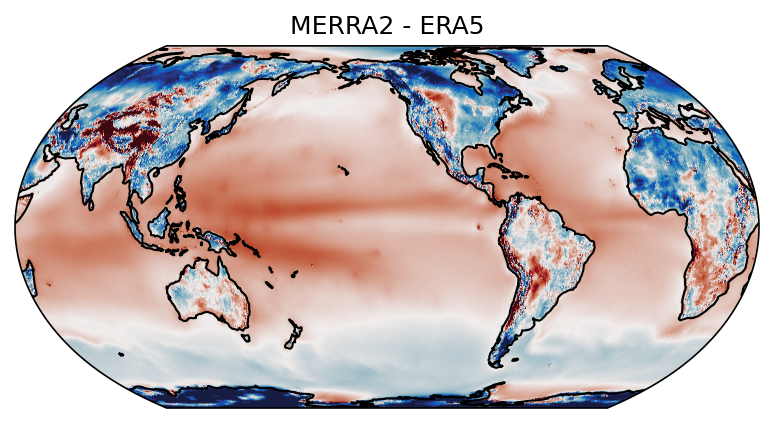

In [15]:
datasets = {
    "ERA5": cat.ERA5(chunks={"cell":-1}).to_dask()["2t"],
    "MERRA2": cat.MERRA2(chunks={'cell':-1}).to_dask()["t2m"],
    "JRA3Q": cat.JRA3Q(chunks={"cell":-1}).to_dask()["mean2t"],
}

diff = datasets["MERRA2"] - datasets["ERA5"]

fig, ax = plt.subplots(dpi=150, subplot_kw={"projection": ccrs.EqualEarth(-135.58)})
ax.set_global()
ax.coastlines()
egh.healpix_show(diff.sel(time=slice("2000", "2020")).mean("time"), vmin=-2, vmax=2, cmap="cmo.balance", ax=ax)
ax.set_title("MERRA2 - ERA5")

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


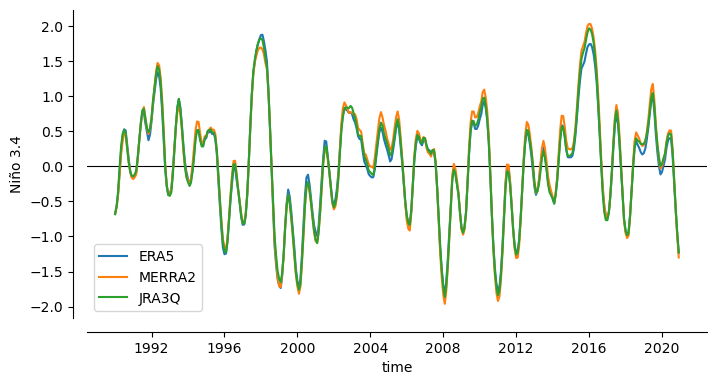

In [17]:
datasets = {
    "ERA5": cat.ERA5.to_dask().skt,
    "MERRA2": cat.MERRA2.to_dask().ts,
    "JRA3Q": cat.JRA3Q.to_dask().msst,
}

fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(0, color="k", linewidth=0.8)
for label, sst in datasets.items():
    # Spatial mean over Nino region
    nino34 = egh.isel_extent(sst, [-170, -120, -5, 5])
    sst = sst.sel(cell=nino34).mean("cell")
    
    # Compute anomaly to reference period
    sst_ref = sst.sel(time=slice("1991", "2000"))
    sst_anom = (sst - sst_ref.mean("time")) / sst_ref.std("time")
    
    # Plot smoothened Nino index values
    sst_anom.rolling(time=5).mean("time").sel(time=slice("1990", "2020")).plot(label=label, ax=ax)
ax.set_ylabel("Niño 3.4")

ax.legend()
ax.set_title("")
sns.despine(offset=10)

/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/homebrew/Caskroom/miniforge/base/envs/default/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be mo

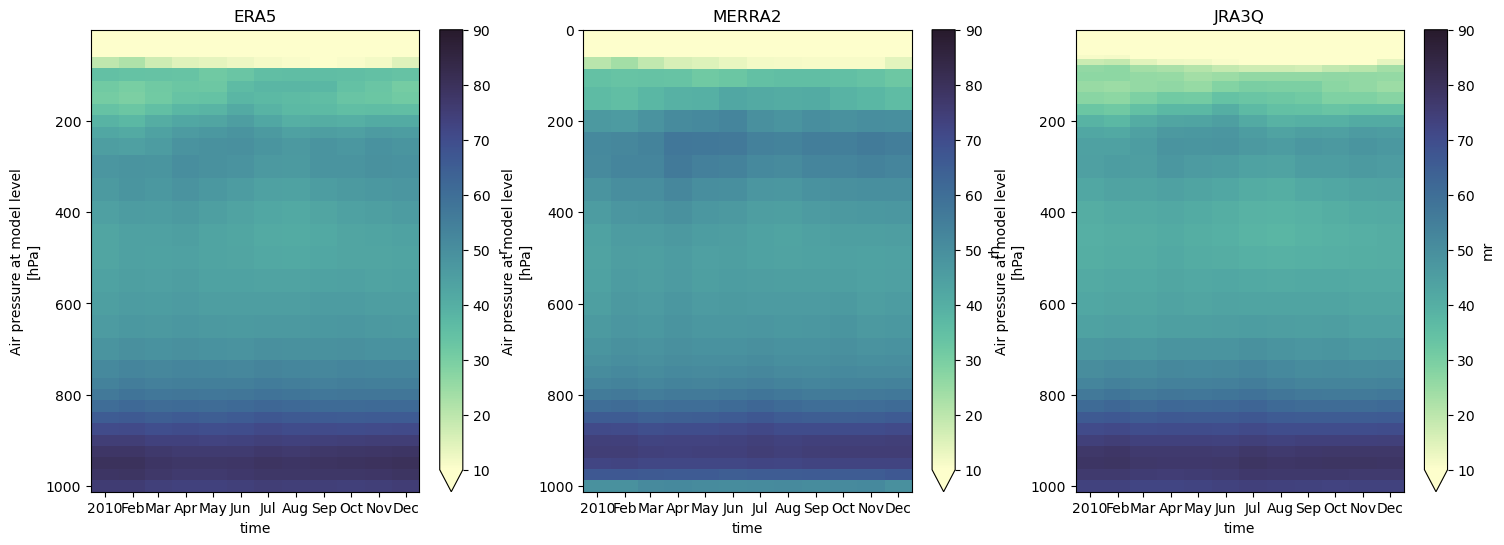

In [34]:
datasets = {
    "ERA5": cat.ERA5(chunks={"cell":-1}).to_dask().r,
    "MERRA2": cat.MERRA2(chunks={"cell":-1}).to_dask().rh*100,
    "JRA3Q": cat.JRA3Q(chunks={"cell":-1}).to_dask().mr,
}

fig, axes = plt.subplots( ncols=3, figsize=(18, 6))

for (label, q), ax in zip(datasets.items(), axes):
    q = q.sel(time="2010").mean("cell").plot(ax=ax, vmin=10, vmax=90, x="time", cmap="cmo.deep")
    ax.invert_yaxis()
    ax.set_title(label)

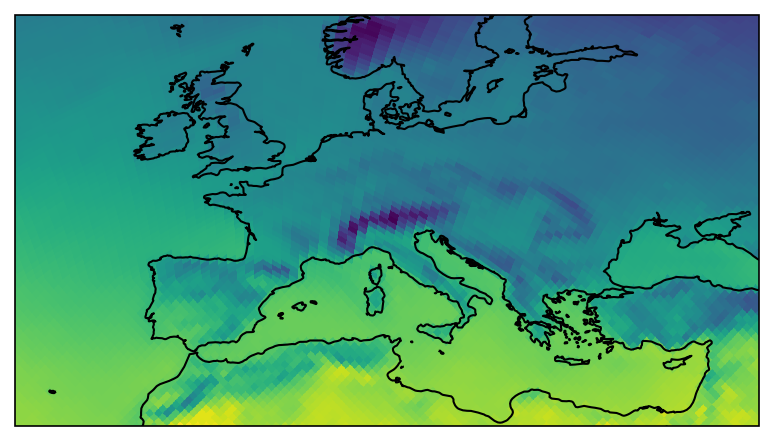

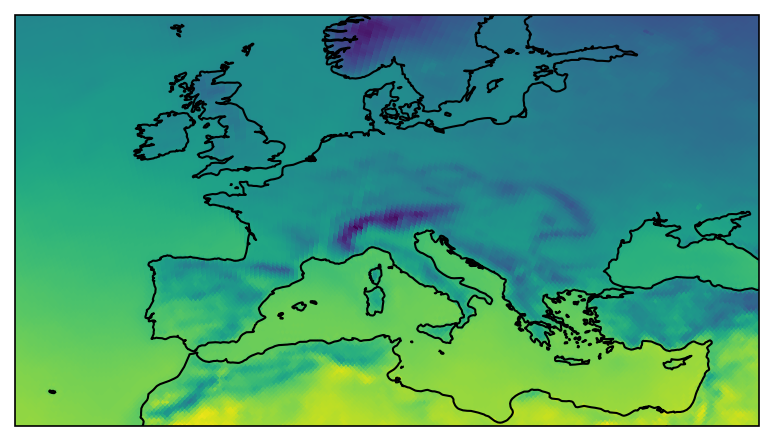

In [5]:
for z in (7, 8):
    ds = cat.ERA5(zoom=z).to_dask()

    fig, ax = plt.subplots(dpi=150, subplot_kw={"projection": ccrs.PlateCarree()})
    ax.set_extent([-20, 40, 30, 60])
    ax.coastlines()
    egh.healpix_show(ds["skt"].sel(time="1991").mean("time"))